## Problem 18: The chi-squared test

Quantized measurements of a sample were taken and the distribution found was: 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import chisquare

# Data
Value = np.array([2, 4, 6, 8, 10, 12, 14, 16, 18])
NofO = np.array([14, 20, 50, 99, 103, 100, 55, 30, 30])

According to the favoured model, it is expected that the sample is Gaussian-distributed with a mean value, $\mu$, of 10, and a standard deviation, $\sigma = 5$. 

In [2]:
def gaussian(x, A, mu, sigma):
    return (A/np.sqrt(2*np.pi*sigma**2)) * np.exp(-(x-mu)**2/(2*sigma**2))

para, popt = curve_fit(gaussian, Value, NofO, p0=[100, 10, 5])
pcov = np.abs(np.diag(popt))

print("The fitted mean is: mu = ", para[1], " +/- ", pcov[1])
print("The fitted standard deviation is: sigma = ", np.abs(para[2]), " +/- ", pcov[2])

The fitted mean is: mu =  10.235907875779562  +/-  0.07688407254593024
The fitted standard deviation is: sigma =  3.6977332486375176  +/-  0.07975303542257985


If this model is normalized such that peak number of occurrences in this experiment is $100$, plot the data and model predictions.

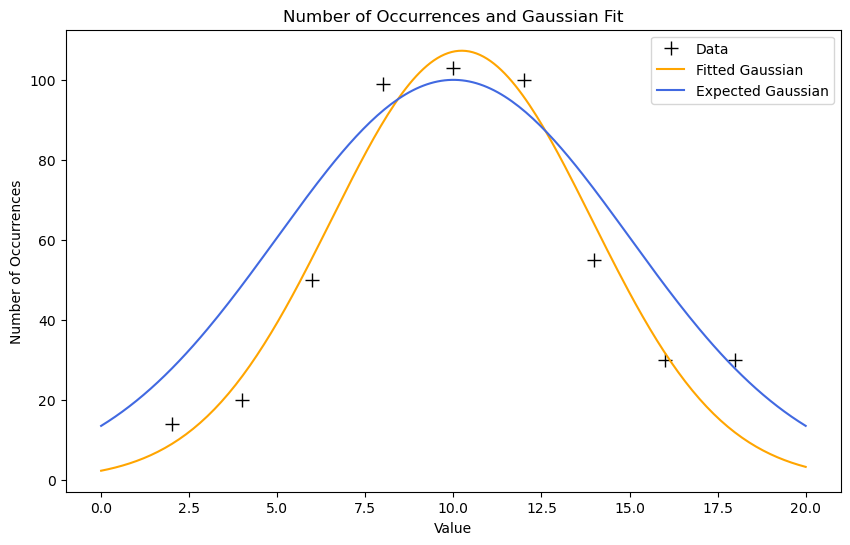

In [3]:
Vt = np.linspace(0, 20, 200)

plt.figure(figsize=(10, 6))
plt.title('Number of Occurrences and Gaussian Fit')
plt.plot(Value, NofO, '+', label='Data', markersize=10, color='black')
plt.plot(Vt, gaussian(Vt, *para), label='Fitted Gaussian', color='orange')
plt.plot(Vt, gaussian(Vt, 100*np.sqrt(2*np.pi*5**2), 10, 5), label='Expected Gaussian', color='royalblue')
plt.xlabel('Value')
plt.ylabel('Number of Occurrences')
plt.legend()
plt.show()

Then use $\chi^2$ to assess how well the model fits the data. Comment on your value for $\chi^2$.

In [4]:
expected_frequencies = gaussian(Value, *para) * np.sum(NofO) / np.sum(gaussian(Value, *para))

chi2_statistic, p_value = chisquare(NofO, expected_frequencies)

print("Chi-squared Statistic:", chi2_statistic)
print("P-value:", p_value)

Chi-squared Statistic: 34.33715183480953
P-value: 3.529118750567267e-05


I had no idea what does "the degree of freedom" mean in the slides. But the p-value suggests that the Gaussian distribution fits the data well. 